In [33]:
import torch
import torch.nn as nn
from torchvision import models

# Define and modify the model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)  # Modify the final layer for 3 classes

# Path to save the models
full_model_path = "full_model.pt"
state_dict_path = "model_11.pt"

# Save the full model
torch.save(model, full_model_path)  # Saves the entire model (structure + weights)




c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_35116\340493046.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/

Classification Report:
              precision    recall  f1-score   support

      NORMAL     0.9704    0.7009    0.8139       234
   PNEUMONIA     0.8462    0.9872    0.9112       390

    accuracy                         0.8798       624
   macro avg     0.9083    0.8440    0.8626       624
weighted avg     0.8928    0.8798    0.8747       624



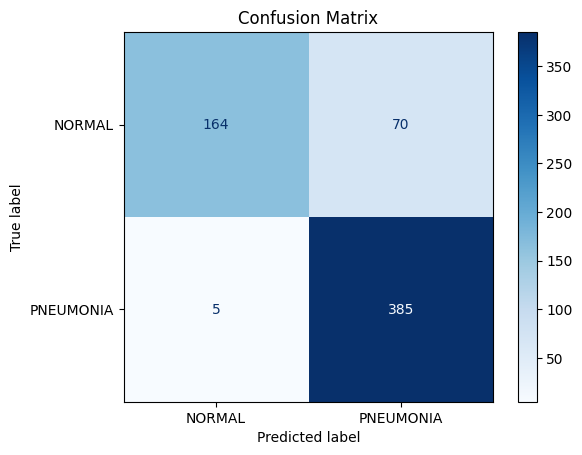

Accuracy: 87.98%


In [8]:
import os
from PIL import Image
import torch
from torchvision import transforms, models
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define transformations
transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  
])


# Load the model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # Modify for binary classification

# Load the trained model weights
model.load_state_dict(torch.load('model9_5.pt'))
model.eval()

# Define test dataset directories
test_dir = r"D:\Pneumonia-Classification-pytorch\chest_xray\test"
normal_dir = os.path.join(test_dir, "NORMAL")
pneumonia_dir = os.path.join(test_dir, "PNEUMONIA")

# Initialize variables to store results
y_true = []  # Ground truth labels
y_pred = []  # Predicted labels

# Helper function to predict a single image
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transformations(image)
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        predicted_label = output.argmax(dim=1).item()
    return predicted_label

# Evaluate NORMAL images
for image_name in os.listdir(normal_dir):
    if image_name.lower().endswith(('png', 'jpg', 'jpeg')):
        image_path = os.path.join(normal_dir, image_name)
        y_true.append(0)  # NORMAL = 0
        y_pred.append(predict_image(image_path))

# Evaluate PNEUMONIA images
for image_name in os.listdir(pneumonia_dir):
    if image_name.lower().endswith(('png', 'jpg', 'jpeg')):
        image_path = os.path.join(pneumonia_dir, image_name)
        y_true.append(1)  # PNEUMONIA = 1
        y_pred.append(predict_image(image_path))

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification report
report = classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA"], digits=4)
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NORMAL", "PNEUMONIA"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy
accuracy = np.sum(y_true == y_pred) / len(y_true) * 100
print(f"Accuracy: {accuracy:.2f}%")


c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\3869536169.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

Classification Report:
              precision    recall  f1-score   support

      NORMAL     0.9758    0.5171    0.6760       234
   PNEUMONIA     0.7740    0.9923    0.8697       390
     UNKNOWN     1.0000    1.0000    1.0000       446

    accuracy                         0.8916      1070
   macro avg     0.9166    0.8365    0.8485      1070
weighted avg     0.9123    0.8916    0.8816      1070



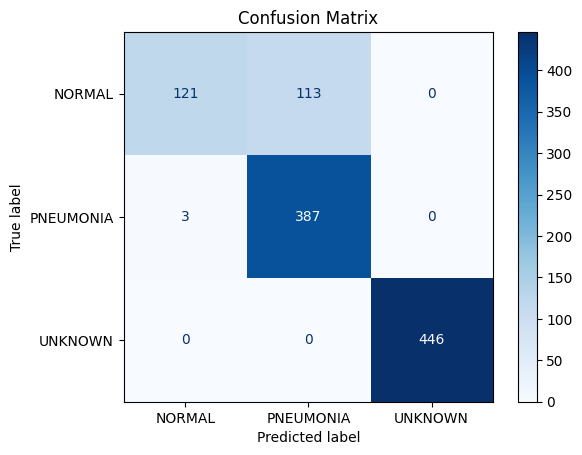

Accuracy: 89.16%


In [14]:
import os
from PIL import Image
import torch
from torchvision import transforms, models
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define transformations
transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  
])

# Load the pretrained ResNet-18 model and modify for 3 classes (NORMAL, PNEUMONIA, UNKNOWN)
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)  # Modify for 3-class classification (e.g., NORMAL, PNEUMONIA, UNKNOWN)

# Load the trained model weights
model.load_state_dict(torch.load('D:\MY_web\portfolio_web_backend-\Train\model\model_24.pt'))
model.eval()

# Define test dataset directories
test_dir = r"D:\Pneumonia-Classification-pytorch\chest_xray\test"
normal_dir = os.path.join(test_dir, "NORMAL")
pneumonia_dir = os.path.join(test_dir, "PNEUMONIA")
unknown_dir = os.path.join(test_dir, "UNKNOWN")  # Assuming you have an UNKNOWN directory

# Initialize variables to store results
y_true = []  # Ground truth labels
y_pred = []  # Predicted labels

# Helper function to predict a single image
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transformations(image)
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        predicted_label = output.argmax(dim=1).item()  # Get the class with the highest score
    return predicted_label

# Evaluate NORMAL images (Ground truth label = 0)
for image_name in os.listdir(normal_dir):
    if image_name.lower().endswith(('png', 'jpg', 'jpeg', '.bmp')):
        image_path = os.path.join(normal_dir, image_name)
        y_true.append(0)  # NORMAL = 0
        y_pred.append(predict_image(image_path))

# Evaluate PNEUMONIA images (Ground truth label = 1)
for image_name in os.listdir(pneumonia_dir):
    if image_name.lower().endswith(('png', 'jpg', 'jpeg','.bmp')):
        image_path = os.path.join(pneumonia_dir, image_name)
        y_true.append(1)  # PNEUMONIA = 1
        y_pred.append(predict_image(image_path))

# Evaluate UNKNOWN images (Ground truth label = 2)
for image_name in os.listdir(unknown_dir):
    if image_name.lower().endswith(('png', 'jpg', 'jpeg','.bmp')):
        image_path = os.path.join(unknown_dir, image_name)
        y_true.append(2)  # UNKNOWN = 2
        y_pred.append(predict_image(image_path))

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification report
report = classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA", "UNKNOWN"], digits=4)
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NORMAL", "PNEUMONIA", "UNKNOWN"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy
accuracy = np.sum(y_true == y_pred) / len(y_true) * 100
print(f"Accuracy: {accuracy:.2f}%")


c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\3101965949.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

Classification Report:
              precision    recall  f1-score   support

      NORMAL     0.9622    0.7607    0.8496       234
   PNEUMONIA     0.8724    0.9821    0.9240       390
     UNKNOWN     1.0000    1.0000    1.0000       446

    accuracy                         0.9411      1070
   macro avg     0.9449    0.9142    0.9245      1070
weighted avg     0.9452    0.9411    0.9394      1070



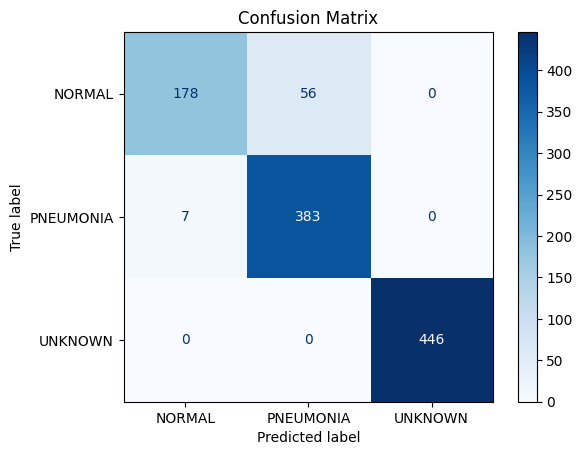

Accuracy: 94.11%


In [28]:
import os
from PIL import Image
import torch
from torchvision import transforms, models
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define transformations
transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB (3 channels)
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ResNet
])
# Load the pretrained ResNet-18 model and modify for 3 classes (NORMAL, PNEUMONIA, UNKNOWN)
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)  # Modify for 3-class classification (e.g., NORMAL, PNEUMONIA, UNKNOWN)

# Load the trained model weights
model.load_state_dict(torch.load('D:\MY_web\portfolio_web_backend-\Train\model\model_11.pt'))
model.eval()

# Define test dataset directories
test_dir = r"D:\Pneumonia-Classification-pytorch\chest_xray\test"
normal_dir = os.path.join(test_dir, "NORMAL")
pneumonia_dir = os.path.join(test_dir, "PNEUMONIA")
unknown_dir = os.path.join(test_dir, "UNKNOWN")  # Assuming you have an UNKNOWN directory

# Initialize variables to store results
y_true = []  # Ground truth labels
y_pred = []  # Predicted labels

# Helper function to predict a single image
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transformations(image)
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        predicted_label = output.argmax(dim=1).item()  # Get the class with the highest score
    return predicted_label

# Evaluate NORMAL images (Ground truth label = 0)
for image_name in os.listdir(normal_dir):
    if image_name.lower().endswith(('png', 'jpg', 'jpeg', '.bmp')):
        image_path = os.path.join(normal_dir, image_name)
        y_true.append(0)  # NORMAL = 0
        y_pred.append(predict_image(image_path))

# Evaluate PNEUMONIA images (Ground truth label = 1)
for image_name in os.listdir(pneumonia_dir):
    if image_name.lower().endswith(('png', 'jpg', 'jpeg','.bmp')):
        image_path = os.path.join(pneumonia_dir, image_name)
        y_true.append(1)  # PNEUMONIA = 1
        y_pred.append(predict_image(image_path))

# Evaluate UNKNOWN images (Ground truth label = 2)
for image_name in os.listdir(unknown_dir):
    if image_name.lower().endswith(('png', 'jpg', 'jpeg','.bmp')):
        image_path = os.path.join(unknown_dir, image_name)
        y_true.append(2)  # UNKNOWN = 2
        y_pred.append(predict_image(image_path))

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification report
report = classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA", "UNKNOWN"], digits=4)
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NORMAL", "PNEUMONIA", "UNKNOWN"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy
accuracy = np.sum(y_true == y_pred) / len(y_true) * 100
print(f"Accuracy: {accuracy:.2f}%")


c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

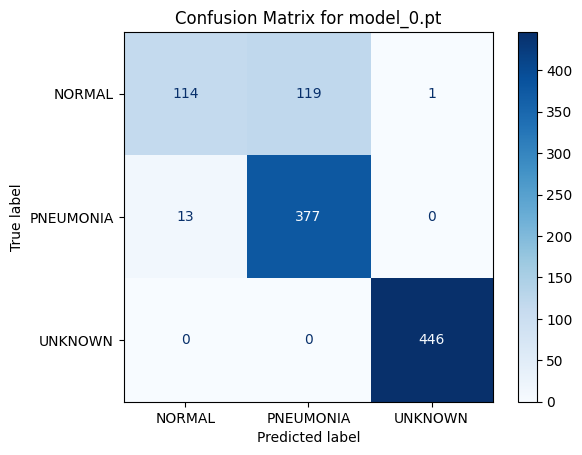

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

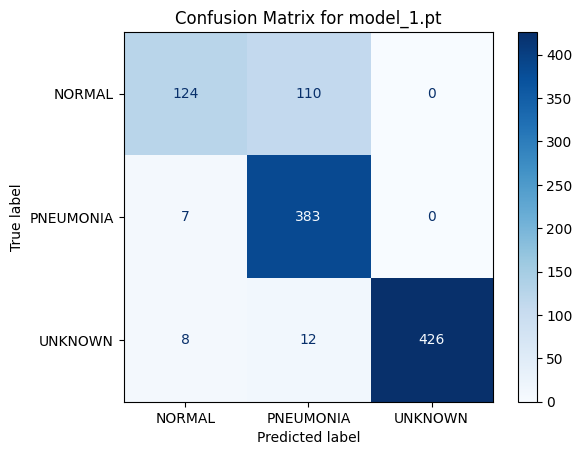

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

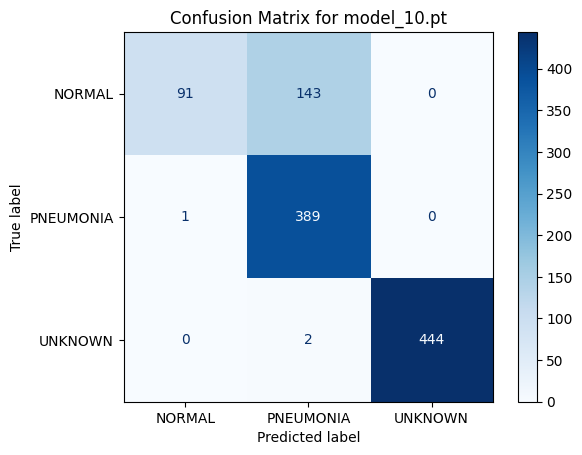

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

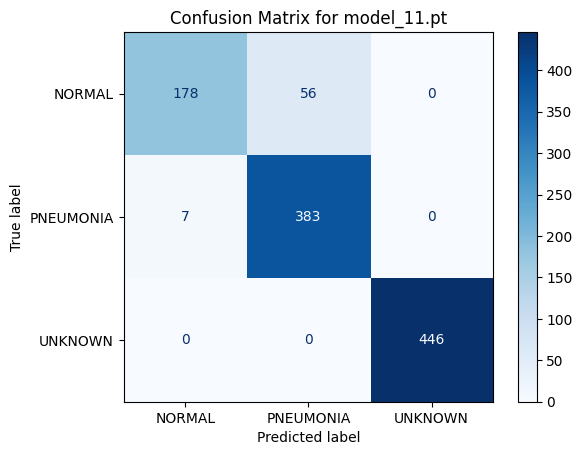

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

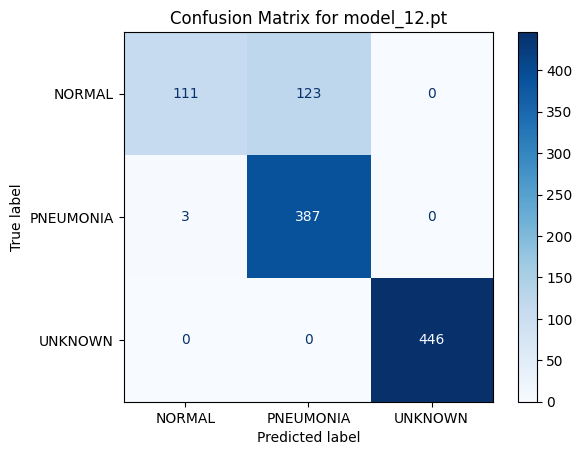

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

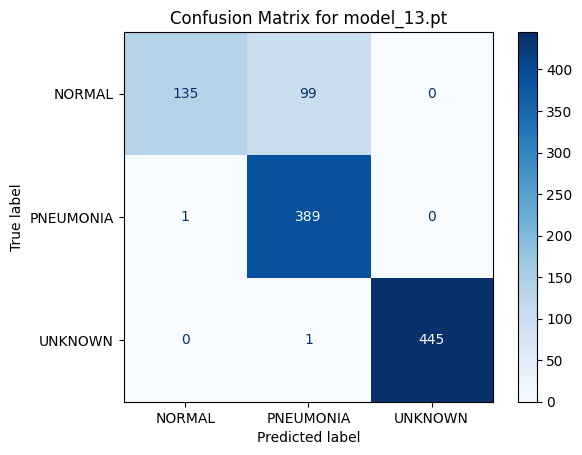

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

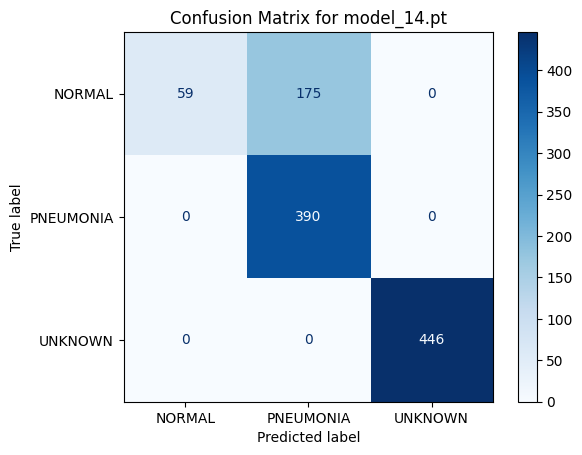

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

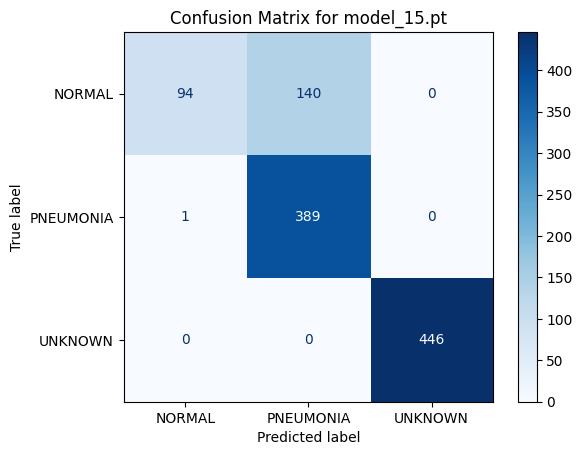

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

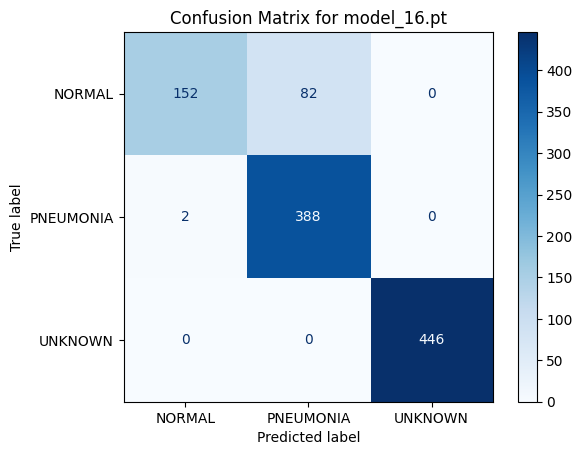

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

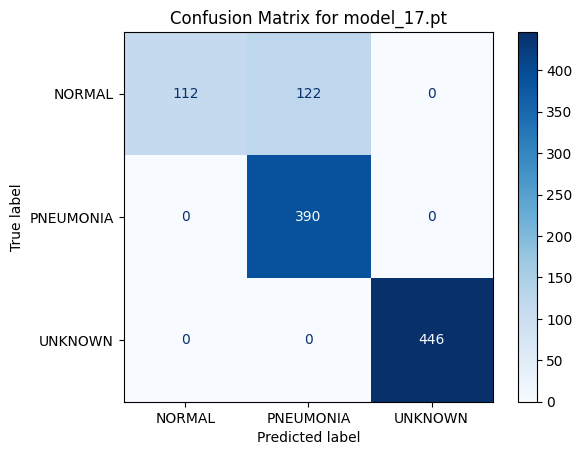

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

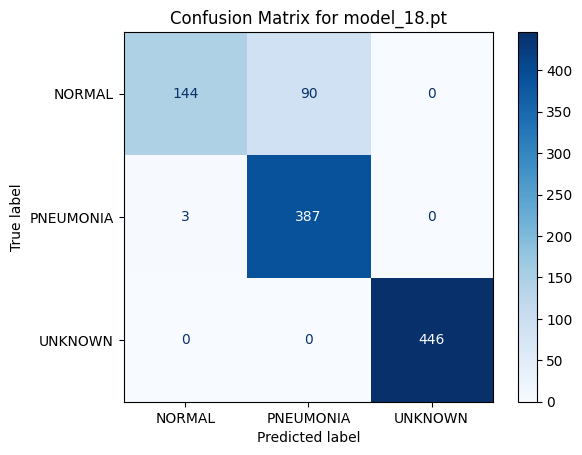

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

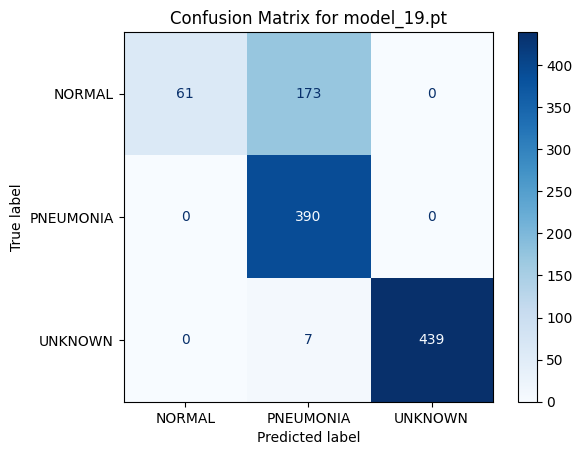

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

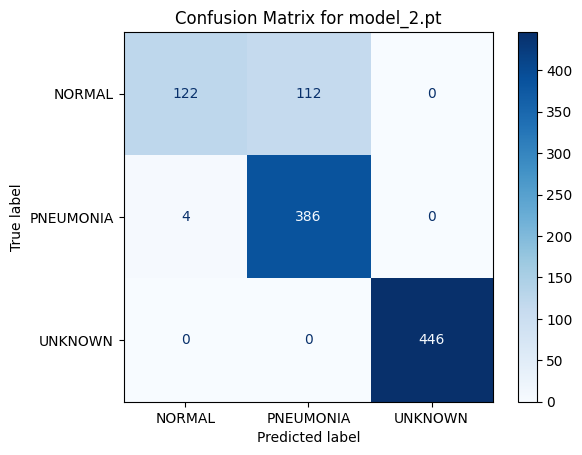

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

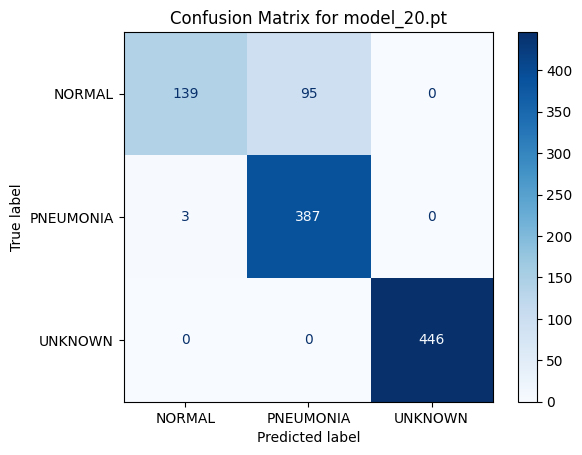

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

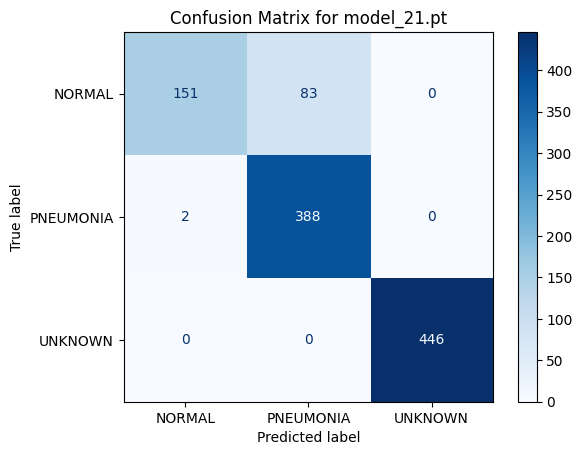

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

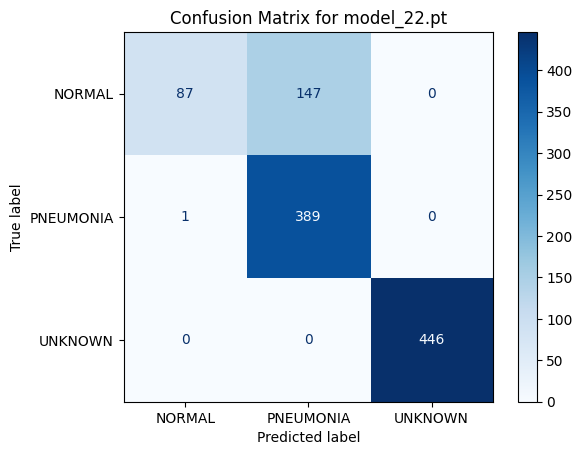

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

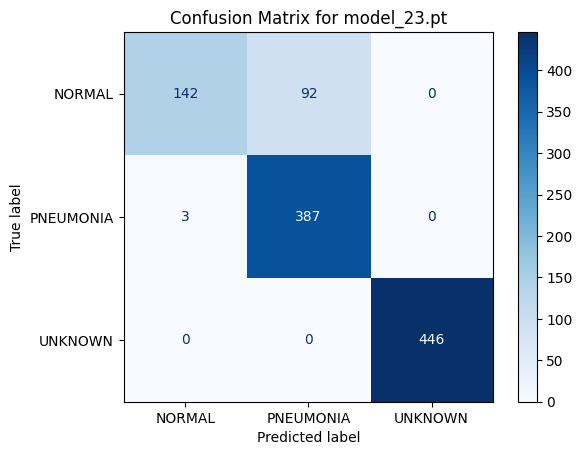

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

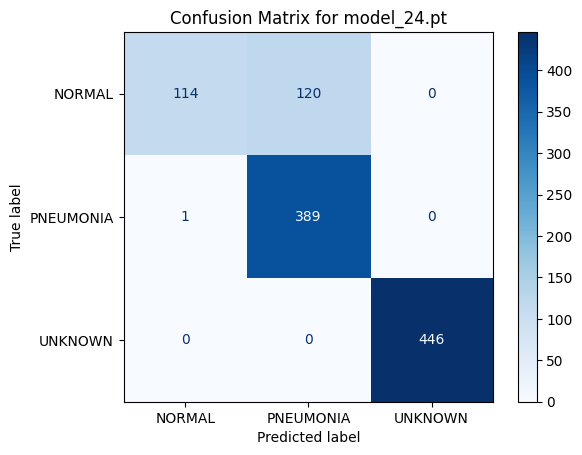

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

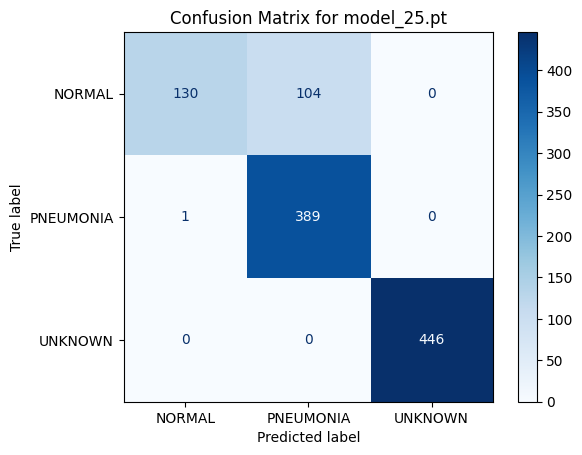

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

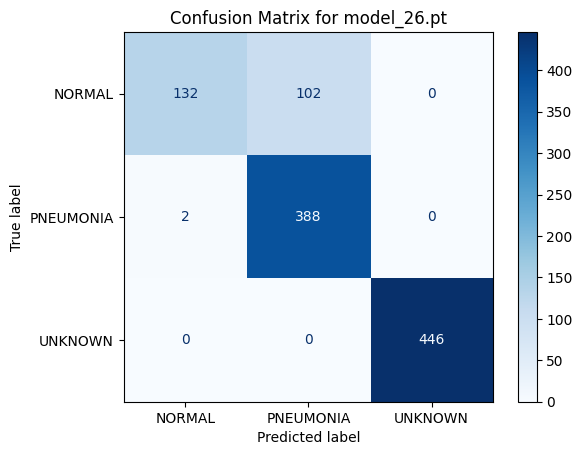

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

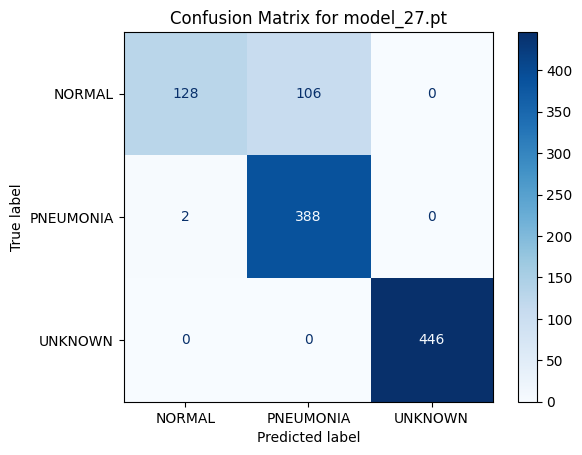

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

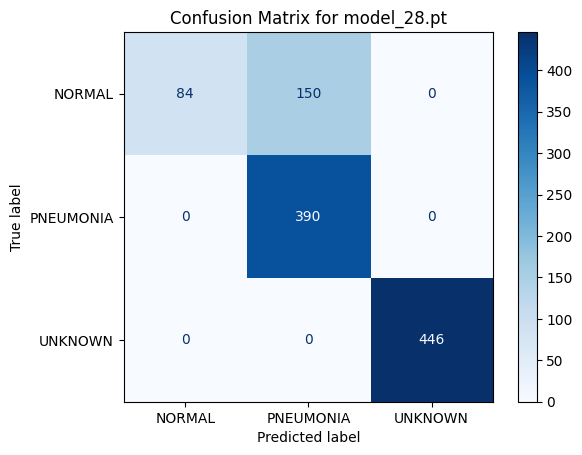

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

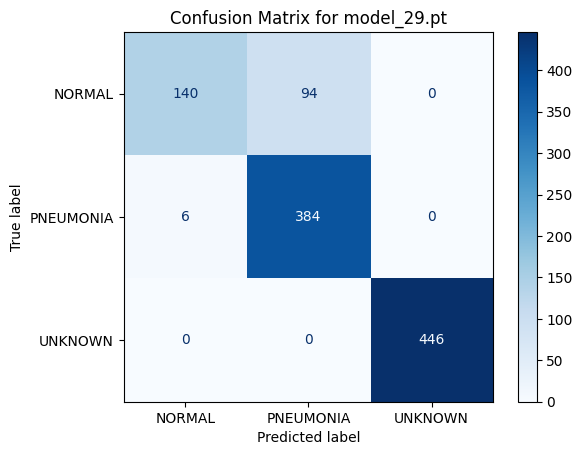

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

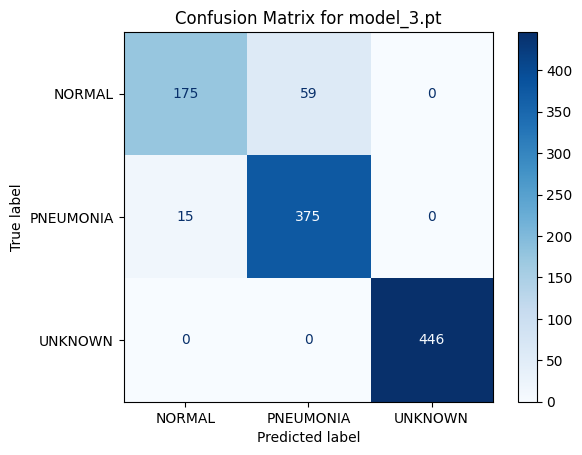

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

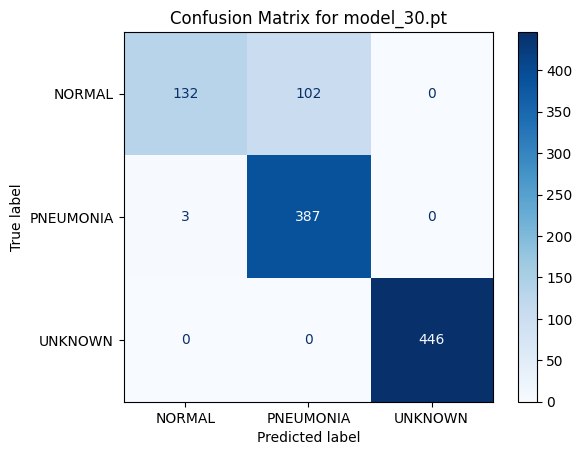

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

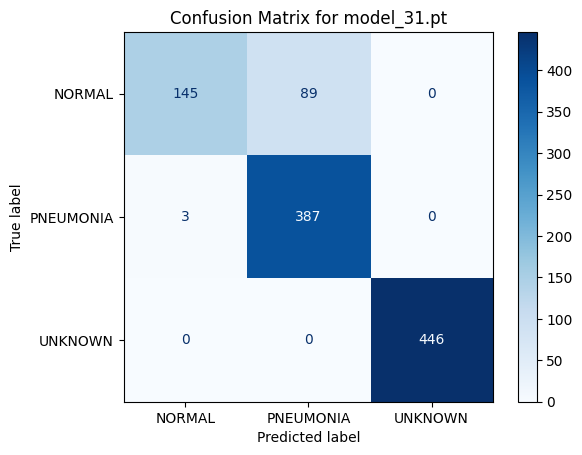

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

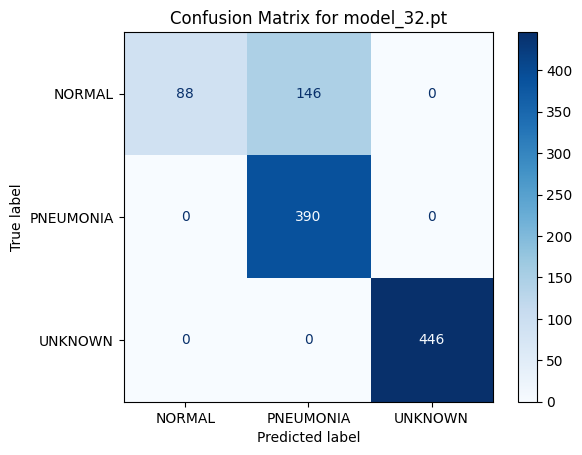

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

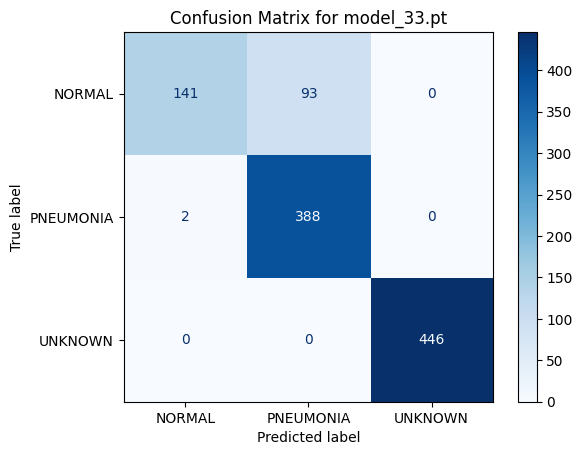

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

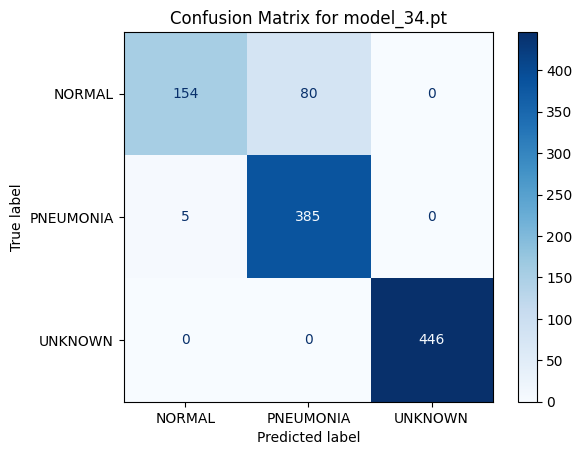

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

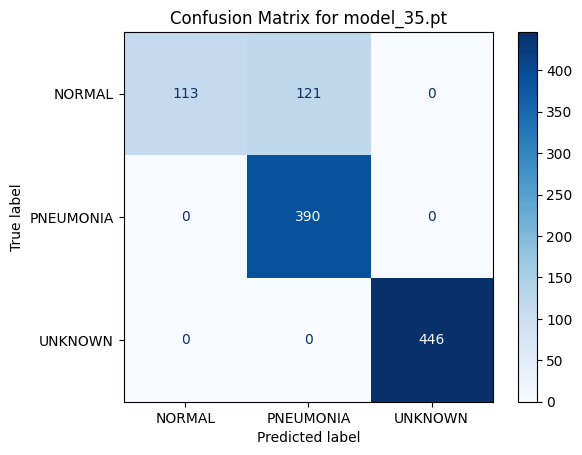

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

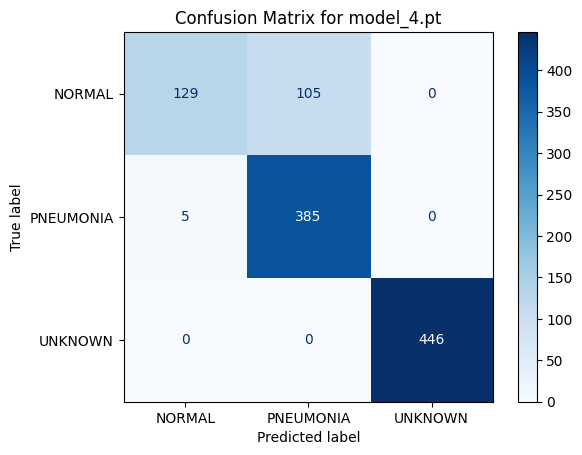

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

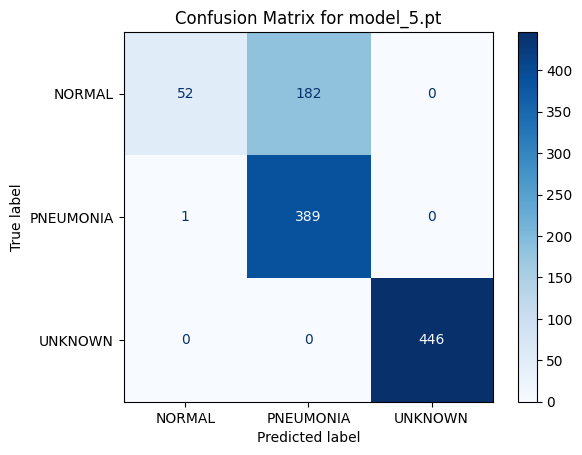

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

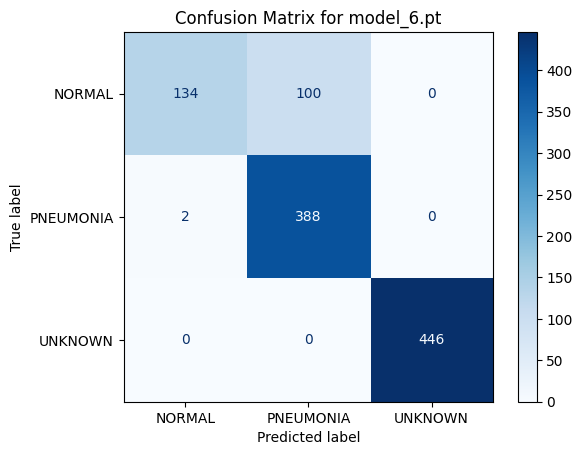

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

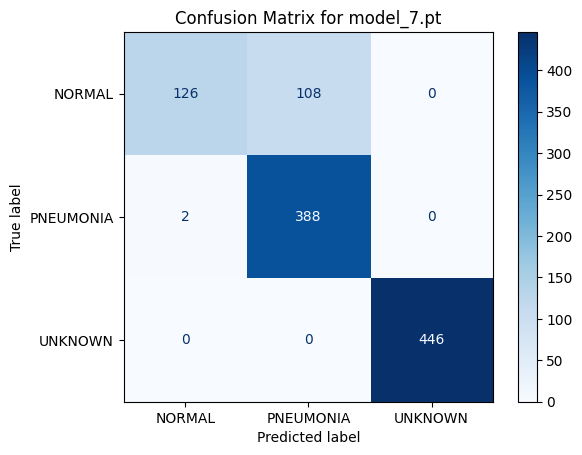

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

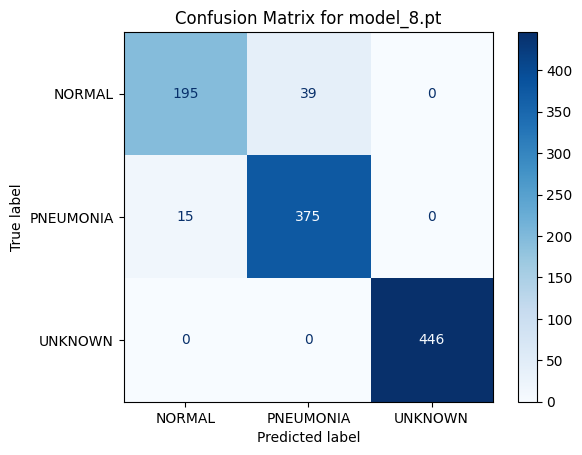

c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_22520\2126221493.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch

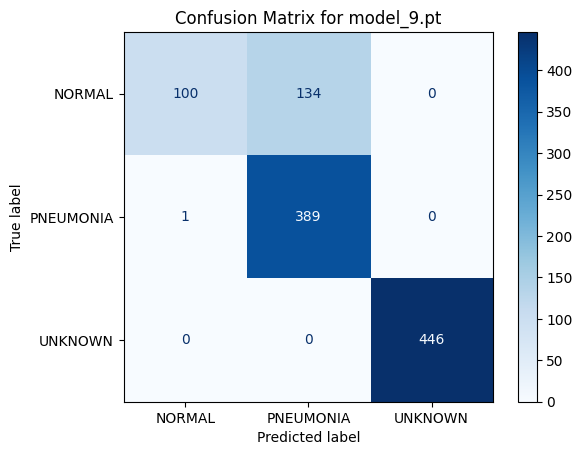


Top 3 Models:

1. Model: model_8.pt
   Precision: 0.9448
   Recall: 0.9316
   F1-Score: 0.9371
   Accuracy: 94.95%
   Classification Report:
              precision    recall  f1-score   support

      NORMAL     0.9286    0.8333    0.8784       234
   PNEUMONIA     0.9058    0.9615    0.9328       390
     UNKNOWN     1.0000    1.0000    1.0000       446

    accuracy                         0.9495      1070
   macro avg     0.9448    0.9316    0.9371      1070
weighted avg     0.9500    0.9495    0.9489      1070


2. Model: model_11.pt
   Precision: 0.9449
   Recall: 0.9143
   F1-Score: 0.9245
   Accuracy: 94.11%
   Classification Report:
              precision    recall  f1-score   support

      NORMAL     0.9622    0.7607    0.8496       234
   PNEUMONIA     0.8724    0.9821    0.9240       390
     UNKNOWN     1.0000    1.0000    1.0000       446

    accuracy                         0.9411      1070
   macro avg     0.9449    0.9142    0.9245      1070
weighted avg     0.9452

In [31]:
import os
from PIL import Image
import torch
from torchvision import transforms, models
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define transformations
transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB (3 channels)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ResNet
])

# Create a custom dataset class
class ChestXRayDataset(Dataset):
    def __init__(self, normal_dir, pneumonia_dir, unknown_dir, transform=None):
        self.normal_dir = normal_dir
        self.pneumonia_dir = pneumonia_dir
        self.unknown_dir = unknown_dir
        self.transform = transform

        self.image_paths = []
        self.labels = []

        # Add NORMAL images
        for image_name in os.listdir(normal_dir):
            if image_name.lower().endswith(('png', 'jpg', 'jpeg', '.bmp')):
                self.image_paths.append(os.path.join(normal_dir, image_name))
                self.labels.append(0)  # NORMAL = 0

        # Add PNEUMONIA images
        for image_name in os.listdir(pneumonia_dir):
            if image_name.lower().endswith(('png', 'jpg', 'jpeg', '.bmp')):
                self.image_paths.append(os.path.join(pneumonia_dir, image_name))
                self.labels.append(1)  # PNEUMONIA = 1

        # Add UNKNOWN images
        for image_name in os.listdir(unknown_dir):
            if image_name.lower().endswith(('png', 'jpg', 'jpeg', '.bmp')):
                self.image_paths.append(os.path.join(unknown_dir, image_name))
                self.labels.append(2)  # UNKNOWN = 2

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define test dataset directories
test_dir = r"D:\Pneumonia-Classification-pytorch\chest_xray\test"
normal_dir = os.path.join(test_dir, "NORMAL")
pneumonia_dir = os.path.join(test_dir, "PNEUMONIA")
unknown_dir = os.path.join(test_dir, "UNKNOWN")  # Assuming you have an UNKNOWN directory

# Create dataset and dataloader
dataset = ChestXRayDataset(normal_dir, pneumonia_dir, unknown_dir, transform=transformations)
batch_size = 32  # Choose a batch size
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Initialize result storage
results = []

# Directory containing the models
models_dir = r"D:\MY_web\portfolio_web_backend-\Train\model"

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loop through all models in the directory
for model_file in os.listdir(models_dir):
    if model_file.endswith('.pt'):  # Check for model files
        model_path = os.path.join(models_dir, model_file)

        # Load the pretrained ResNet-18 model and modify for 3 classes (NORMAL, PNEUMONIA, UNKNOWN)
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, 3)  # Modify for 3-class classification
        model.load_state_dict(torch.load(model_path))
        model.to(device)
        model.eval()

        # Initialize variables to store results for this model
        y_true = []  # Ground truth labels
        y_pred = []  # Predicted labels

        # Batch processing loop
        with torch.no_grad():
            for images, labels in dataloader:
                images = images.to(device)
                labels = labels.numpy()

                # Get predictions for the batch
                outputs = model(images)
                _, preds = torch.max(outputs, 1)

                y_true.extend(labels)
                y_pred.extend(preds.cpu().numpy())

        # Convert results to NumPy arrays
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        # Calculate classification metrics
        report = classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA", "UNKNOWN"], digits=4)
        accuracy = np.sum(y_true == y_pred) / len(y_true) * 100

        # Save results
        results.append({
            'model': model_file,
            'precision': np.mean([float(line.split()[1]) for line in report.splitlines()[2:-4]]),  # Extract precision values
            'recall': np.mean([float(line.split()[2]) for line in report.splitlines()[2:-4]]),     # Extract recall values
            'f1_score': np.mean([float(line.split()[3]) for line in report.splitlines()[2:-4]]),    # Extract f1-score values
            'accuracy': accuracy,
            'report': report
        })

        # Optionally, plot confusion matrix for each model (skip this part if too many models)
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NORMAL", "PNEUMONIA", "UNKNOWN"])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix for {model_file}")
        plt.show()

# Sort results by F1 score and get the top 3 models
sorted_results = sorted(results, key=lambda x: x['f1_score'], reverse=True)
top_3_models = sorted_results[:3]

# Print the top 3 models based on F1, Precision, and Accuracy
print("\nTop 3 Models:")
for i, model_info in enumerate(top_3_models, 1):
    print(f"\n{str(i)}. Model: {model_info['model']}")
    print(f"   Precision: {model_info['precision']:.4f}")
    print(f"   Recall: {model_info['recall']:.4f}")
    print(f"   F1-Score: {model_info['f1_score']:.4f}")
    print(f"   Accuracy: {model_info['accuracy']:.2f}%")
    print(f"   Classification Report:\n{model_info['report']}")
